<a href="https://colab.research.google.com/github/Texugo-928/Projeto_ML_Churn/blob/cicero/Projeto_ML_Grupo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Projeto Final da disciplina Machine Learning I**


### **Descrição**

Este notebook apresenta uma análise de dados feita a partir de datasets de Análise de Churn.

### **Identificação da equipe**

**Grupo 4:** Cícero Vicente, Jorge Dantas, Mohara Nascimento, Nathália Martins, Pedro Henrique

**Programa:** Santander Coders 2023

### **Dataset**

O conjunto de dados utilizado neste projeto foi retirado diretamente do kaggle. Cuja fonte é a seguinte:

- Análise de Churn (Escrever algo a mais): https://www.kaggle.com/datasets/blastchar/telco-customer-churn


### **Orientações para o projeto**

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informações sobre as variáveis em si e suas relações com as demais;

- **Modelagem dos dados**: Nessa parte, deve ser definido o tipo de problema (classificação/regressão). Vocês precisam **treinar pelo menos três (3) modelos** (pode ser testado mais que três modelos distintos) e de acordo com alguma métrica de avaliação (escolhida pelo grupo), decidir qual será o melhor modelo a ser utilizado!;

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.



### **Sumário**

1. [Dados iniciais](#1-dados-iniciais)
2. [Tratamento dos dados](#2-tratamento-dos-dados)
3. [Analise exploratorios dos dados](#3-analise-exploratorios-dos-dados)
4. [Modelagem](#4-modelagem)
5. [Otimizacao de modelos](#5-otimizacao-de-modelos)
6. [Conclusoes](#6-conclusoes)

### **[1. Dados iniciais](#1.-Dados-iniciais)**

- Explicar o problema a ser resolvido (fraude, churn, previsão, etc). Indicando o problema de negócio (por quê esse dado é interessante?)

O projeto tem como objetivo analisar o problema de negócio relacionado ao número de clientes que cancelam o serviço mensalmente (churn) no mercado de telecomunicações. Baseando-se no tipo de serviço contratado, perfil pessoal (idade, gênero, parceiros e dependentes) do cliente e dados relacionados a conta do cliente, o projeto visa propor um algoritmo que consiga mapear e classificar a possibilidade de churn ou não.

- Leitura de dados iniciais

In [527]:
# Após analisar a base mais a fundo seria interessante falar sobre variáveis que foram deletadas e outras que sejam mais importantes para o negócio.

In [528]:
#Importação Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from plotnine import *
#from scipy.stats import norm, linregress
#from matplotlib.widgets import Button
%matplotlib inline
#import ipywidgets as widgets
#from IPython.display import clear_output

In [529]:
#Para quem for abrir no Google Colab descomentar linhas abaixo
from google.colab import drive
drive.mount('/content/drive')
database = 'Dataset.csv'
df_churn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning I - Projeto Final/' + database, sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [530]:
#Para quem for abrir no VS Code descomentar linhas abaixo
#Carregamento DataSet
#df_churn = pd.read_csv('Dataset.csv', sep=',')

In [531]:
#Head DataFrame
df_churn.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [532]:
df_churn.shape

(7043, 21)

In [533]:
#Columns DataFrame
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- Verificando algumas colunas que possivemente são categóricas

Foi alinhado que para o cenário onde a coluna possui menos de 10 valores únicos, ela será imediatamente considerada como categórica

In [534]:
colunas = df_churn.columns

lista_colunas_categoricas = list()

for c in colunas:
    unique = df_churn[c].unique().size
    print(f"Coluna: {c}, Qntd Valores Únicos: {unique}")
    print()

    if unique < 10:
      lista_colunas_categoricas.append(c)

Coluna: customerID, Qntd Valores Únicos: 7043

Coluna: gender, Qntd Valores Únicos: 2

Coluna: SeniorCitizen, Qntd Valores Únicos: 2

Coluna: Partner, Qntd Valores Únicos: 2

Coluna: Dependents, Qntd Valores Únicos: 2

Coluna: tenure, Qntd Valores Únicos: 73

Coluna: PhoneService, Qntd Valores Únicos: 2

Coluna: MultipleLines, Qntd Valores Únicos: 3

Coluna: InternetService, Qntd Valores Únicos: 3

Coluna: OnlineSecurity, Qntd Valores Únicos: 3

Coluna: OnlineBackup, Qntd Valores Únicos: 3

Coluna: DeviceProtection, Qntd Valores Únicos: 3

Coluna: TechSupport, Qntd Valores Únicos: 3

Coluna: StreamingTV, Qntd Valores Únicos: 3

Coluna: StreamingMovies, Qntd Valores Únicos: 3

Coluna: Contract, Qntd Valores Únicos: 3

Coluna: PaperlessBilling, Qntd Valores Únicos: 2

Coluna: PaymentMethod, Qntd Valores Únicos: 4

Coluna: MonthlyCharges, Qntd Valores Únicos: 1585

Coluna: TotalCharges, Qntd Valores Únicos: 6531

Coluna: Churn, Qntd Valores Únicos: 2



In [535]:
print(f"Qntd de colunas categóricas: {len(lista_colunas_categoricas)}")
print()
lista_colunas_categoricas

Qntd de colunas categóricas: 17



['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Como o dataset possui algumas colunas com menos de 10 valores únicos. Vamos investigá-las com um pouco mais de profundidade para entender melhor suas categorias.

In [536]:
df_churn['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [537]:
# Idoso
df_churn['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [538]:
df_churn['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [539]:
df_churn['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [540]:
df_churn['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [541]:
df_churn['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

As colunas PhoneService e MultipleLines estão relacionadas

In [542]:
df_churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [543]:
df_churn['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [544]:
df_churn['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [545]:
df_churn['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [546]:
df_churn['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [547]:
df_churn['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [548]:
df_churn['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

As colunas InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, StreamingTV e StreamingMovies estão relacionadas

In [549]:
df_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [550]:
df_churn['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [551]:
df_churn['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [552]:
# Não consegui identificar a relação entre PaperlessBilling e PaymentMethod

In [553]:
df_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

A coluna customerid será deletada porque o ID é um dado único do cliente e não um padrão que poderia interferir na possibilidade de churn. Logo, não agregará valor à análise

Lista de colunas não estudadas até aqui:
- tenure: Número de meses que o cliente permaneceu na empresa
- MonthlyCharges: Fatura do último mês
- TotalCharges: Montante desembolsado pelo cliente em serviços da empresa

### **[2. Tratamento dos dados](#2.-Tratamento-dos-dados)**

- Explicar os motivos dos tratamentos de dados
- Criar funções reutilizáveis e limpas
- Demonstrar os efeitos positivos (ou possíveis melhorias) dessas transformações
- Feature engineering

In [554]:
#Verificar existência de nulos
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [555]:
# Verificar se há dados duplicados: Não há dados duplicados
df_churn.duplicated().sum()

0

In [556]:
#Removendo a coluna customerID
df_churn.drop(columns='customerID', axis=1, inplace=True)
df_churn.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes
OnlineBackup,Yes,No,Yes,No,No,No,Yes,No,No,Yes,...,No,Yes,No,Yes,No internet service,No,Yes,No,No,No


A coluna customerID foi deletada porque o ID é um dado único do cliente e não um padrão que poderia interferir na possibilidade de churn.

In [557]:
#Info DataFrame
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [558]:
df_churn['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [559]:
df_churn['TotalCharges'].dtype

dtype('O')

Note que a coluna TotalCharges precisa ser convertida de object para float. Mas antes disso, iremos veriicar se existe string vazia nessa coluna.

In [560]:
len(df_churn.loc[df_churn['TotalCharges']==' '])

11

In [561]:
df_churn.loc[df_churn['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [562]:
df_churn['TotalCharges'] = df_churn['TotalCharges'].replace(' ', np.nan)
df_churn['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [563]:
df_churn.iloc[488,:]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [564]:
# Conversão para tipo float:
df_churn['TotalCharges'] = df_churn['TotalCharges'].astype('float', errors='ignore')
df_churn['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [565]:
df_churn['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

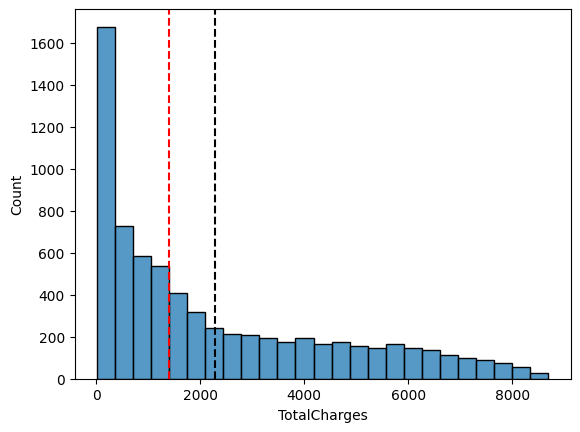

In [566]:
sns.histplot(df_churn['TotalCharges'])
plt.axvline(df_churn['TotalCharges'].mean(), ls='--', color='black')
plt.axvline(df_churn['TotalCharges'].median(),ls='--', color='red')

<Axes: xlabel='TotalCharges', ylabel='Count'>

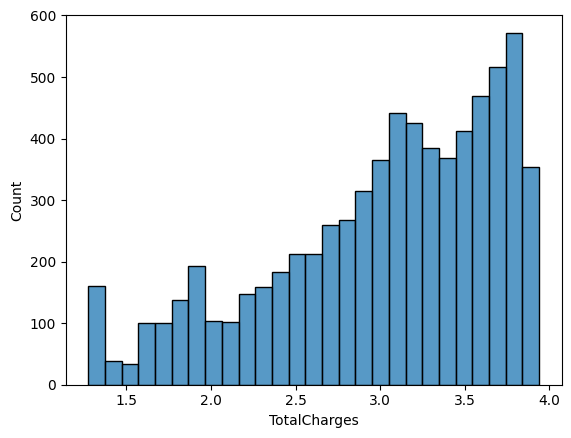

In [567]:
sns.histplot(np.log10(df_churn['TotalCharges']))

<Axes: xlabel='TotalCharges', ylabel='Count'>

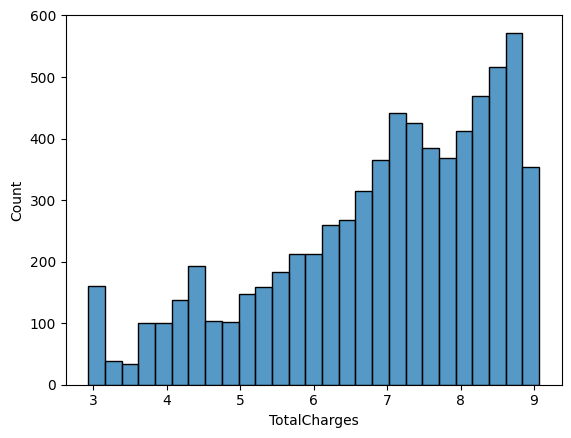

In [568]:
sns.histplot(np.log(df_churn['TotalCharges']))

In [569]:
#df_churn['TotalCharges'].fillna(df_churn['TotalCharges'].mean(), inplace=True)
df_churn['TotalCharges'].fillna(df_churn['TotalCharges'].median(), inplace=True)

In [570]:
df_churn['TotalCharges'].describe()

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

Antes de tratar os NaN:
- Média = 2283.300441
- Mediana = 1397.475000

Depois de tratar os NaN:
- Média = 2281.916928
- Mediana = 1397.475000

In [571]:
# Transformar as colunas categóricas com o get dummies/one hot encoder...
colunas = df_churn.columns

for c in colunas:
    if (c != 'Churn'): df_churn[c].replace({'Yes':1, 'No':0}, inplace=True)

df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,No
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [572]:
for c in lista_colunas_categoricas:
  print(f"Coluna: {c}")
  print(f"Elemetos Únicos: {df_churn[c].unique()}")
  print()

Coluna: gender
Elemetos Únicos: ['Female' 'Male']

Coluna: SeniorCitizen
Elemetos Únicos: [0 1]

Coluna: Partner
Elemetos Únicos: [1 0]

Coluna: Dependents
Elemetos Únicos: [0 1]

Coluna: PhoneService
Elemetos Únicos: [0 1]

Coluna: MultipleLines
Elemetos Únicos: ['No phone service' 0 1]

Coluna: InternetService
Elemetos Únicos: ['DSL' 'Fiber optic' 0]

Coluna: OnlineSecurity
Elemetos Únicos: [0 1 'No internet service']

Coluna: OnlineBackup
Elemetos Únicos: [1 0 'No internet service']

Coluna: DeviceProtection
Elemetos Únicos: [0 1 'No internet service']

Coluna: TechSupport
Elemetos Únicos: [0 1 'No internet service']

Coluna: StreamingTV
Elemetos Únicos: [0 1 'No internet service']

Coluna: StreamingMovies
Elemetos Únicos: [0 1 'No internet service']

Coluna: Contract
Elemetos Únicos: ['Month-to-month' 'One year' 'Two year']

Coluna: PaperlessBilling
Elemetos Únicos: [1 0]

Coluna: PaymentMethod
Elemetos Únicos: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit

Coluna desconsideradas no get dummy:
- Churn
- PaperlessBilling
- PhoneService
- Dependents
- Partner
- SeniorCitizen

In [573]:
df_churn = pd.get_dummies(
    df_churn, # dataset
    prefix_sep='_',
    columns=[
        'gender',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaymentMethod'
    ]
)

In [574]:
df_churn

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,No,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,No,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,Yes,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,No,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,Yes,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,No,0,...,0,1,0,0,1,0,0,0,0,1
7039,0,1,1,72,1,1,103.20,7362.90,No,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,11,0,1,29.60,346.45,No,1,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,1,74.40,306.60,Yes,0,...,1,0,0,1,0,0,0,0,0,1


In [575]:
# sns.pairplot(df_churn, hue='Churn')

### **[3. Analise exploratorios dos dados](#3.-Analise-exploratorios-dos-dados)**

- Estatística descritiva
- Informações gerais dos dados
- Primeira hipóteses

In [76]:
#Info DataFrame
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   PaperlessBilling                         7043 non-null   int64  
 6   MonthlyCharges                           7043 non-null   float64
 7   TotalCharges                             7043 non-null   float64
 8   Churn                                    7043 non-null   int64  
 9   gender_Female                            7043 non-null   uint8  
 10  gender_Male                              7043 no

In [77]:
# Seria melhor dar um describe depois de converter as variáveis categóricas para obter mais informações
df_churn.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,0.265370,0.495244,...,0.395428,0.387903,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.000258,0.441561,0.500013,...,0.488977,0.487307,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1400.550000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **[4. Modelagem](#4.-Modelagem)**

- Selecionar modelos a serem utilizados
- Explicar potenciais benefícios
- Mostrar principais métricas
- Conclusões iniciais

<Axes: >

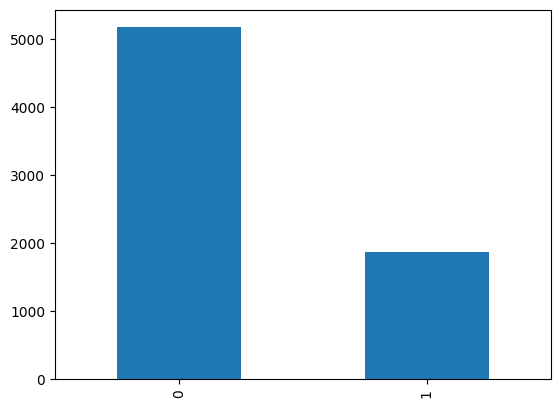

In [78]:
df_churn['Churn'].value_counts().plot(kind='bar')

In [79]:
# Possíveis modelos: árvore de decisão, xgboost
# Atributos (X) e target (y)
X = df_churn.drop(['Churn'], axis=1)
y = df_churn['Churn']

In [80]:
# Tá desbalanceado?!

In [81]:
from sklearn import model_selection
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =(model_selection.train_test_split(X, y, test_size=0.3, stratify=y, random_state=42))

In [82]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
y_pred = model.predict(X_test)

In [84]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1552
           1       0.48      0.49      0.49       561

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113



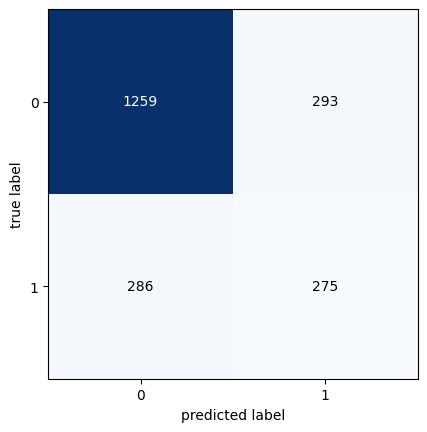

In [85]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

def plot_cm(y_test, y_pred): # cm -> matriz de confusão
  cm = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(conf_mat=cm)
  plt.show()

plot_cm(y_test, y_pred)

### **[5. Otimizacao de modelos](#5.-Otimizacao-de-modelos)**

- Optimização dos hiperparâmetros, pelo menos um (1) modelo
- Demonstrar de forma clara quais os resultados obtidos

### **[6. Conclusoes](#6.-Conclusoes)**

- Explicar os principais achados (comparação de métricas e modelos)
- Próximos passos
- Potenciais ganhos para o negócio